## A big shout out to study group. What a great group!

In [95]:


import nltk 
nltk.corpus.gutenberg.fileids()
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\weird\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
# it is amazing how many of these I end up not using during edits and revisions 

from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from matplotlib import pyplot as plt
import pandas as pd
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [97]:
import nltk
nltk.download('subjectivity')

[nltk_data] Downloading package subjectivity to
[nltk_data]     C:\Users\weird\AppData\Roaming\nltk_data...
[nltk_data]   Package subjectivity is already up-to-date!


True

In [98]:
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\weird\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

3) Load the tokenized Paradise Lost from the Gutenberg Corpus in NLTK. https://www.nltk.org/book/ch02.html . Stem or lemmatize the words and find counts. Select the top 20 words and create a histogram. Exclude stop words and make sure you are including words of all capitalizations in your count. If there are any meaningless “words” that are produced in your list or top words, alter your logic to exclude them. Specify why you chose stemming or lemmatization. *


I didn't really have any rhyme or reason why I chose one over the other. I originally chose lemmatization because I don't have as good of a grasp on what that is about as I do with stemming, but there was a nonsense word and I wasn't sure how to get rid of it. I switched to stemming in hopes that there would be no nonsense words, but I was foiled and had to go about figuring out how to get rid of the nonsense word. I didn't bother to redo my lemmatization code and stuck with stemming. 

Overall I feel I really walked around the block to get across the street on this one but I got across the street.

In [99]:

#import and parse into sentences
text_sentences = nltk.corpus.gutenberg.sents("milton-paradise.txt")#[:10]
print(text_sentences)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [100]:
#turn list of lists to a list. Thank you google. 
flat_list = [item for sublist in text_sentences for item in sublist]

In [101]:
type(flat_list)

list

In [102]:
flat_list


['[',
 'Paradise',
 'Lost',
 'by',
 'John',
 'Milton',
 '1667',
 ']',
 'Book',
 'I',
 'Of',
 'Man',
 "'",
 's',
 'first',
 'disobedience',
 ',',
 'and',
 'the',
 'fruit',
 'Of',
 'that',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'Brought',
 'death',
 'into',
 'the',
 'World',
 ',',
 'and',
 'all',
 'our',
 'woe',
 ',',
 'With',
 'loss',
 'of',
 'Eden',
 ',',
 'till',
 'one',
 'greater',
 'Man',
 'Restore',
 'us',
 ',',
 'and',
 'regain',
 'the',
 'blissful',
 'seat',
 ',',
 'Sing',
 ',',
 'Heavenly',
 'Muse',
 ',',
 'that',
 ',',
 'on',
 'the',
 'secret',
 'top',
 'Of',
 'Oreb',
 ',',
 'or',
 'of',
 'Sinai',
 ',',
 'didst',
 'inspire',
 'That',
 'shepherd',
 'who',
 'first',
 'taught',
 'the',
 'chosen',
 'seed',
 'In',
 'the',
 'beginning',
 'how',
 'the',
 'heavens',
 'and',
 'earth',
 'Rose',
 'out',
 'of',
 'Chaos',
 ':',
 'or',
 ',',
 'if',
 'Sion',
 'hill',
 'Delight',
 'thee',
 'more',
 ',',
 'and',
 'Siloa',
 "'",
 's',
 'brook',
 'that',
 'flowed',
 'Fast',
 'by',

In [103]:
# stop words
sw = set(nltk.corpus.stopwords.words('english'))


In [104]:
  
# get rid of stop words and put in new list    
filtered_list = [w for w in flat_list if w.lower() not in sw]

In [105]:
print(filtered_list)

['[', 'Paradise', 'Lost', 'John', 'Milton', '1667', ']', 'Book', 'Man', "'", 'first', 'disobedience', ',', 'fruit', 'forbidden', 'tree', 'whose', 'mortal', 'taste', 'Brought', 'death', 'World', ',', 'woe', ',', 'loss', 'Eden', ',', 'till', 'one', 'greater', 'Man', 'Restore', 'us', ',', 'regain', 'blissful', 'seat', ',', 'Sing', ',', 'Heavenly', 'Muse', ',', ',', 'secret', 'top', 'Oreb', ',', 'Sinai', ',', 'didst', 'inspire', 'shepherd', 'first', 'taught', 'chosen', 'seed', 'beginning', 'heavens', 'earth', 'Rose', 'Chaos', ':', ',', 'Sion', 'hill', 'Delight', 'thee', ',', 'Siloa', "'", 'brook', 'flowed', 'Fast', 'oracle', 'God', ',', 'thence', 'Invoke', 'thy', 'aid', 'adventurous', 'song', ',', 'middle', 'flight', 'intends', 'soar', 'th', "'", 'Aonian', 'mount', ',', 'pursues', 'Things', 'unattempted', 'yet', 'prose', 'rhyme', '.', 'chiefly', 'thou', ',', 'Spirit', ',', 'dost', 'prefer', 'temples', 'th', "'", 'upright', 'heart', 'pure', ',', 'Instruct', ',', 'thou', 'know', "'", 'st', '

In [106]:
#get everything lowercase and put in new list. 

lower_list = list(map(lambda x: x.lower(), filtered_list))

In [107]:
lower_list

['[',
 'paradise',
 'lost',
 'john',
 'milton',
 '1667',
 ']',
 'book',
 'man',
 "'",
 'first',
 'disobedience',
 ',',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'brought',
 'death',
 'world',
 ',',
 'woe',
 ',',
 'loss',
 'eden',
 ',',
 'till',
 'one',
 'greater',
 'man',
 'restore',
 'us',
 ',',
 'regain',
 'blissful',
 'seat',
 ',',
 'sing',
 ',',
 'heavenly',
 'muse',
 ',',
 ',',
 'secret',
 'top',
 'oreb',
 ',',
 'sinai',
 ',',
 'didst',
 'inspire',
 'shepherd',
 'first',
 'taught',
 'chosen',
 'seed',
 'beginning',
 'heavens',
 'earth',
 'rose',
 'chaos',
 ':',
 ',',
 'sion',
 'hill',
 'delight',
 'thee',
 ',',
 'siloa',
 "'",
 'brook',
 'flowed',
 'fast',
 'oracle',
 'god',
 ',',
 'thence',
 'invoke',
 'thy',
 'aid',
 'adventurous',
 'song',
 ',',
 'middle',
 'flight',
 'intends',
 'soar',
 'th',
 "'",
 'aonian',
 'mount',
 ',',
 'pursues',
 'things',
 'unattempted',
 'yet',
 'prose',
 'rhyme',
 '.',
 'chiefly',
 'thou',
 ',',
 'spirit',
 ',',
 'dost',
 'pr

In [108]:
# get rid of various punctuation. This may not be exhaustive, but I can't imagine any other punctuation appearing more than 
#the top 20 words. I am also willing to bet that there is a much better way to go about this. probably using .isalpha or something

omit = [ ".", "-", "!", ",", "?", "[", "]", "'", ";", ":", "&", '"', "--" ]

final_list = [w for w in lower_list if w not in omit]

In [109]:
final_list

['paradise',
 'lost',
 'john',
 'milton',
 '1667',
 'book',
 'man',
 'first',
 'disobedience',
 'fruit',
 'forbidden',
 'tree',
 'whose',
 'mortal',
 'taste',
 'brought',
 'death',
 'world',
 'woe',
 'loss',
 'eden',
 'till',
 'one',
 'greater',
 'man',
 'restore',
 'us',
 'regain',
 'blissful',
 'seat',
 'sing',
 'heavenly',
 'muse',
 'secret',
 'top',
 'oreb',
 'sinai',
 'didst',
 'inspire',
 'shepherd',
 'first',
 'taught',
 'chosen',
 'seed',
 'beginning',
 'heavens',
 'earth',
 'rose',
 'chaos',
 'sion',
 'hill',
 'delight',
 'thee',
 'siloa',
 'brook',
 'flowed',
 'fast',
 'oracle',
 'god',
 'thence',
 'invoke',
 'thy',
 'aid',
 'adventurous',
 'song',
 'middle',
 'flight',
 'intends',
 'soar',
 'th',
 'aonian',
 'mount',
 'pursues',
 'things',
 'unattempted',
 'yet',
 'prose',
 'rhyme',
 'chiefly',
 'thou',
 'spirit',
 'dost',
 'prefer',
 'temples',
 'th',
 'upright',
 'heart',
 'pure',
 'instruct',
 'thou',
 'know',
 'st',
 'thou',
 'first',
 'wast',
 'present',
 'mighty',
 'wi

In [110]:
#instantiate
stemmer = SnowballStemmer(language = "english")




# Stem all tokens into a new list: stemmed
stemmed = [stemmer.stem(t) for t in final_list]

top_20 = Counter(stemmed).most_common(20)


top_20

# we have our top 20 but there is a nonsense word. 

# I'm super torn here. Originally I thought to get rid of thou, thee and thus but  since they aren't in the stop word list 
# so I leaned slightly toward leaving them in since they aren't technically in the list of stop words. 
#IF I did want to take them out I'd put 
#them up in my "omit" list further up so I do know how to get rid of them. Study group is saying they are wanting to get 
# rid of them but I can't shake that they're there for a reason. I'm going to keep them and if I have time I'll swing through 
# and do another version getting rid of them. 
# 

[('heaven', 485),
 ('thou', 432),
 ('thi', 414),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('earth', 228),
 ('yet', 228),
 ('though', 217),
 ('us', 187),
 ('man', 178),
 ('first', 175),
 ('high', 159),
 ('day', 157),
 ('one', 142),
 ('power', 133),
 ('like', 132),
 ('son', 132),
 ('great', 130)]

In [111]:
# lets take the top 21
top_20_revised = Counter(stemmed).most_common(21)

# and pop out that inconvenient little nonsense word

new_top_20 = list(filter(lambda c: c[0] != 'thi', top_20_revised))

# to get the new top 20
new_top_20


[('heaven', 485),
 ('thou', 432),
 ('thee', 358),
 ('thus', 318),
 ('god', 316),
 ('shall', 283),
 ('earth', 228),
 ('yet', 228),
 ('though', 217),
 ('us', 187),
 ('man', 178),
 ('first', 175),
 ('high', 159),
 ('day', 157),
 ('one', 142),
 ('power', 133),
 ('like', 132),
 ('son', 132),
 ('great', 130),
 ('far', 129)]

<AxesSubplot:xlabel='word'>

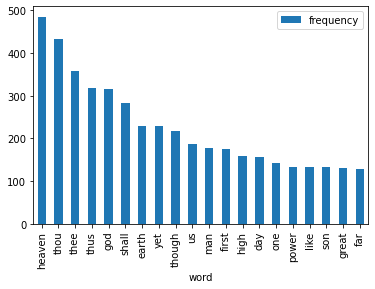

In [112]:
#bar graph because I forgot it was histogram we were looking for and I did this first. 

#turn the list of tuples into a dataframe
df = pd.DataFrame(new_top_20, columns=['word', 'frequency'])

#plot
df.plot(kind='bar', x='word')

Text(0, 0.5, 'frequency of frequency of word')

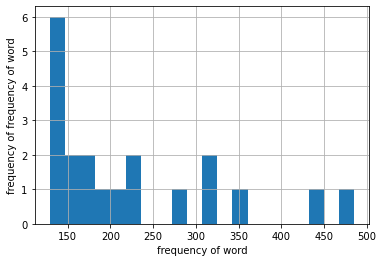

In [113]:
#histogram of the stemmed data

df['frequency'].hist(bins = 20)
plt.xlabel('frequency of word')
plt.ylabel('frequency of frequency of word')

4) Perform Vader Sentiment Analysis on the book. Find the 5 most negative, 5 most positive, and 5 most neutral sentences in Paradise Lost. http://www.nltk.org/howto/sentiment.html . This may take a while to run, so you can always start with a small subset of the data (100 sentences) and then once your code works as expected, expand it to the whole book and let it run. *

In [114]:
#paradise = nltk.corpus.gutenberg.sents("milton-paradise.txt")#[:10]


In [115]:
#def undo(sentences): 
#    for element in sentences:
#        print (' '.join(word for word in element))

#sentence = undo(paradise)

[ Paradise Lost by John Milton 1667 ]
Book I
Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .
And chiefly thou , O Spirit , that dost prefer Before all temples th ' upright heart and pure , Instruct me , for thou know ' st ; thou from the first Wast present , and , with mighty wings outspread , Dove - like sat ' st brooding on the vast Abyss , And mad '

Book VI
All night the dreadless Angel , unpursued , Through Heaven ' s wide champain held his way ; till Morn , Waked by the circling Hours , with rosy hand Unbarred the gates of light .
There is a cave Within the mount of God , fast by his throne , Where light and darkness in perpetual round Lodge and dislodge by turns , which makes through Heaven Grateful vicissitude , like day and night ; Light issues forth , and at the other door Obsequious darkness enters , till her hour To veil the Heaven , though darkness there might well Seem twilight here : And now went forth the Morn Such as in highest Heaven arrayed in gold Empyreal ; from before her vanished Night , Shot through with orient beams ; when all the plain Covered with thick embattled squadrons bright , Chariots , and flaming arms , and fiery steeds , Reflecting blaze on blaze , first met his view : War he perceived , war in procinct ; and found Already known what he for news had thought To have reported : Gladly then he mixed Am

of evil , if what is evil Be real , why not known , since easier shunned ?
God therefore cannot hurt ye , and be just ; Not just , not God ; not feared then , nor obeyed : Your fear itself of death removes the fear .
Why then was this forbid ?
Why , but to awe ; Why , but to keep ye low and ignorant , His worshippers ?
He knows that in the day Ye eat thereof , your eyes that seem so clear , Yet are but dim , shall perfectly be then Opened and cleared , and ye shall be as Gods , Knowing both good and evil , as they know .
That ye shall be as Gods , since I as Man , Internal Man , is but proportion meet ; I , of brute , human ; ye , of human , Gods .
So ye shall die perhaps , by putting off Human , to put on Gods ; death to be wished , Though threatened , which no worse than this can bring .
And what are Gods , that Man may not become As they , participating God - like food ?
The Gods are first , and that advantage use On our belief , that all from them proceeds : I question it ; for thi

To sojourn in that land He comes , invited by a younger son In time of dearth , a son whose worthy deeds Raise him to be the second in that realm Of Pharaoh .
There he dies , and leaves his race Growing into a nation , and now grown Suspected to a sequent king , who seeks To stop their overgrowth , as inmate guests Too numerous ; whence of guests he makes them slaves Inhospitably , and kills their infant males : Till by two brethren ( these two brethren call Moses and Aaron ) sent from God to claim His people from enthralment , they return , With glory and spoil , back to their promised land .
But first , the lawless tyrant , who denies To know their God , or message to regard , Must be compelled by signs and judgements dire ; To blood unshed the rivers must be turned ; Frogs , lice , and flies , must all his palace fill With loathed intrusion , and fill all the land ; His cattle must of rot and murren die ; Botches and blains must all his flesh emboss , And all his people ; thunder mi

In [116]:
#instantiate
sia = SentimentIntensityAnalyzer()

In [117]:

# just testing stuff out here 


#def sentiment_analyzer_scores(sentence):
#    score = analyser.polarity_scores(sentence)
#    print("{:-<40} {}".format(sentence, str(score)))

In [118]:
#u = 'This is a sentence.'

In [119]:
#sentiment_analyzer_scores(u)

In [120]:
#loading as a sentence 
lost = nltk.corpus.gutenberg.sents("milton-paradise.txt")
print(lost)

[['[', 'Paradise', 'Lost', 'by', 'John', 'Milton', '1667', ']'], ['Book', 'I'], ...]


In [121]:
#sentimenting from class work
sentiments=[]
for sentence in lost:
    lost_lines = " ".join(sentence)
    sentiment = sia.polarity_scores(lost_lines)
    compound = sentiment["compound"]
    pos = sentiment["pos"]
    neu = sentiment["neu"]
    neg = sentiment["neg"]
    sentiments.append({
            "text":lost_lines,
            "compound":compound,
            "positive":pos,
            "negative":neg,
            "neutral":neu
    })
    
sentiments[:10] # just a snippet to make sure it looks right.

[{'text': '[ Paradise Lost by John Milton 1667 ]',
  'compound': 0.4404,
  'positive': 0.4,
  'negative': 0.219,
  'neutral': 0.381},
 {'text': 'Book I',
  'compound': 0.0,
  'positive': 0.0,
  'negative': 0.0,
  'neutral': 1.0},
 {'text': "Of Man ' s first disobedience , and the fruit Of that forbidden tree whose mortal taste Brought death into the World , and all our woe , With loss of Eden , till one greater Man Restore us , and regain the blissful seat , Sing , Heavenly Muse , that , on the secret top Of Oreb , or of Sinai , didst inspire That shepherd who first taught the chosen seed In the beginning how the heavens and earth Rose out of Chaos : or , if Sion hill Delight thee more , and Siloa ' s brook that flowed Fast by the oracle of God , I thence Invoke thy aid to my adventurous song , That with no middle flight intends to soar Above th ' Aonian mount , while it pursues Things unattempted yet in prose or rhyme .",
  'compound': 0.8885,
  'positive': 0.192,
  'negative': 0.117,

In [122]:
# Turn sentiment to dataframe

In [123]:
df = pd.DataFrame.from_dict(sentiments)

In [124]:
df

,text,compound,positive,negative,neutral
0,[ Paradise Lost by John Milton 1667 ],0.4404,0.400,0.219,0.381
1,Book I,0.0000,0.000,0.000,1.000
2,"Of Man ' s first disobedience , and the fruit ...",0.8885,0.192,0.117,0.691
3,"And chiefly thou , O Spirit , that dost prefer...",0.7331,0.163,0.085,0.752
4,Say first -- for Heaven hides nothing from thy...,0.8689,0.239,0.093,0.668
...,...,...,...,...,...
1846,This further consolation yet secure I carry he...,0.5719,0.283,0.150,0.567
1847,So spake our mother Eve ; and Adam heard Well ...,0.7469,0.111,0.000,0.889
1848,"High in front advanced , The brandished sword ...",0.6597,0.107,0.028,0.865
1849,"They , looking back , all the eastern side beh...",0.9068,0.185,0.061,0.754


In [125]:
# Top 5 most positive. Looks like we have some duplicates. They are different instances though. 

positive_top_5 = df.sort_values('positive', ascending = False)

In [126]:
positive_top_5.head()

,text,compound,positive,negative,neutral
605,O friends !,0.5255,1.000,0.0,0.000
1441,O Heaven !,0.5562,1.000,0.0,0.000
828,O Heaven !,0.5562,1.000,0.0,0.000
908,O Friends !,0.5255,1.000,0.0,0.000
1233,"She fair , divinely fair , fit love for Gods !",0.9381,0.838,0.0,0.162


In [127]:
# sort by negative descending 
negative_top_5 = df.sort_values('negative', ascending = False)

In [128]:
# top 5 most negative 


negative_top_5.head()

,text,compound,positive,negative,neutral
512,O Hell !,-0.7088,0.0,1.000,0.000
153,No !,-0.3595,0.0,1.000,0.000
1689,Alas !,-0.3382,0.0,1.000,0.000
478,Me miserable !,-0.5411,0.0,0.777,0.223
175,Sad cure !,-0.5255,0.0,0.772,0.228


In [129]:
# same deal here. Neautral top 5 sorted  and displayed
neutral_top_5 = df.sort_values('neutral', ascending = False)

In [130]:
neutral_top_5.head()



,text,compound,positive,negative,neutral
1850,[ The End ],0.0,0.0,0.0,1.0
1236,and toward Eve Addressed his way : not with in...,0.0,0.0,0.0,1.0
1214,So spake the patriarch of mankind ; but Eve Pe...,0.0,0.0,0.0,1.0
327,whom follow ?,0.0,0.0,0.0,1.0
326,"Thou art my father , thou my author , thou My ...",0.0,0.0,0.0,1.0


In [131]:
# getting a better look at the sentences since my dataframe cuts them off
sentiments[1236]

{'text': 'and toward Eve Addressed his way : not with indented wave , Prone on the ground , as since ; but on his rear , Circular base of rising folds , that towered Fold above fold , a surging maze !',
 'compound': 0.0,
 'positive': 0.0,
 'negative': 0.0,
 'neutral': 1.0}

In [132]:
sentiments[1214]

{'text': 'So spake the patriarch of mankind ; but Eve Persisted ; yet submiss , though last , replied .',
 'compound': 0.0,
 'positive': 0.0,
 'negative': 0.0,
 'neutral': 1.0}

In [133]:
sentiments[326]

{'text': "Thou art my father , thou my author , thou My being gav ' st me ; whom should I obey But thee ?",
 'compound': 0.0,
 'positive': 0.0,
 'negative': 0.0,
 'neutral': 1.0}

In [134]:
# Attempting to get rid of the duplicates on the positive 
# sort by text
df.sort_values("text", inplace = True)

 # dropping  duplicate values
new = df.drop_duplicates(subset ="text",
                     keep = "first", inplace = True)

new_positive = df.sort_values('positive',ascending = False)
# so it looks like Milton got tricky and did the same sentence just with different capitalization 

new_positive.head()

,text,compound,positive,negative,neutral
908,O Friends !,0.5255,1.000,0.0,0.000
1441,O Heaven !,0.5562,1.000,0.0,0.000
605,O friends !,0.5255,1.000,0.0,0.000
1233,"She fair , divinely fair , fit love for Gods !",0.9381,0.838,0.0,0.162
1142,"Be strong , live happy , and love !",0.9098,0.793,0.0,0.207


5)	Explain your findings from the previous question. Are the sentences and their sentiment analysis scores correct? Explain why or why not. 



The sentiment analysis is a little tricky. Since we are only looking at one sentence at a time there is really no way to tell if "O Friends" or "O Heaven" is positive or negative. It could be a curse like "oh for F*#$ sake". Or it could be him speaking positively. We'd actually have to read the surrounding sentences to be sure. So that means the top 3 are essentially invalid. For the other two in the top 5 positive I'd say they hit the nail on the head. 

For the negatives "Alas" could go either way. Likely it is negative, but to be in the top 5 negative doesn't seem right. 


For neutral "the end" is about as neutral as it gets. The second sentence ends with an "!" so I would think that would have a little less of a neutral weight about it. The other three I couldn't muster up much feeling about so I would say that is a good indication that they're neutral. Overall I'd say there is some work to be done on the sentiment analysis.